# Importing required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the dataset.

In [2]:
import pandas as pd
df = pd.read_excel(r'flight_data_final.xlsx')
df

,Airline_name,Date_of_Journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,Jet Airways,9/05/2022,Kolkata,Banglore,09:35,10:55:00,25h 20m,1 stop,10953
1,SpiceJet,3/04/2022,Kolkata,Banglore,17:10,19:40:00,2h 30m,non-stop,3841
2,IndiGo,1/06/2022,Delhi,Cochin,05:10,10:05:00,4h 55m,1 stop,6842
3,Jet Airways,27/05/2022,Delhi,Cochin,09:00,12:35:00,27h 35m,1 stop,12898
4,Vistara,7/09/2022,Mumbai,Bangalore,17:35,09:00,15h 25m,1 stop,9280
...,...,...,...,...,...,...,...,...,...
1530,SpiceJet,21/03/2022,Banglore,New Delhi,10:20,18:15:00,7h 55m,1 stop,7139
1531,Jet Airways,27/04/2022,Banglore,Delhi,06:00,08:45:00,2h 45m,non-stop,4544
1532,IndiGo,10/11/2022,Pune,Bangalore,22:20,23:55,1h 35m,non-stop,5418
1533,IndiGo,18/05/2022,Delhi,Cochin,08:35,16:10:00,7h 35m,1 stop,6442


In [3]:
# Get the numbers of rows and columns.
df.shape

(1535, 9)

In [4]:
# Check column of the dataframe.
df.columns

Index(['Airline_name', 'Date_of_Journey', 'Source', 'Destination',
       'Departure_time', 'Arrival_time', 'Duration', 'Total_stops', 'Price'],
      dtype='object')

In [5]:
# Get the column datatypes.
df.dtypes

Airline_name       object
Date_of_Journey    object
Source             object
Destination        object
Departure_time     object
Arrival_time       object
Duration           object
Total_stops        object
Price               int64
dtype: object

In [6]:
# Basic information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline_name     1535 non-null   object
 1   Date_of_Journey  1535 non-null   object
 2   Source           1535 non-null   object
 3   Destination      1535 non-null   object
 4   Departure_time   1535 non-null   object
 5   Arrival_time     1535 non-null   object
 6   Duration         1535 non-null   object
 7   Total_stops      1535 non-null   object
 8   Price            1535 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 108.1+ KB


In [7]:
# Get a count of the empty values for each column.
df.isna().sum()

Airline_name       0
Date_of_Journey    0
Source             0
Destination        0
Departure_time     0
Arrival_time       0
Duration           0
Total_stops        0
Price              0
dtype: int64

In [8]:
# Check any missing/null values in the dataset.
df.isnull().values.any()

False

<AxesSubplot:>

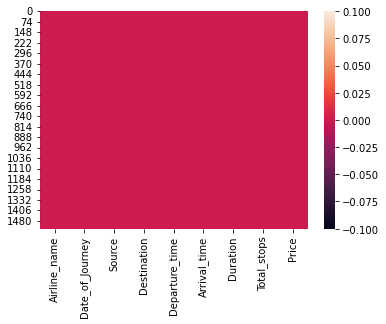

In [9]:
#Checking for null values using heatmap.
sns.heatmap(df.isnull())

In [12]:
# Checking Duplicate values of dataset:
df[df.duplicated()]

,Airline_name,Date_of_Journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
1063,Air India,21/05/2022,Delhi,Cochin,22:00,19:15:00,21h 15m,2 stops,10231
1429,Jet Airways,1/06/2022,Delhi,Cochin,14:35,04:25:00,13h 50m,2 stops,13376


In [13]:
# Drop duplicate values.
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Airline_name,Date_of_Journey,Source,Destination,Departure_time,Arrival_time,Duration,Total_stops,Price
0,Jet Airways,9/05/2022,Kolkata,Banglore,09:35,10:55:00,25h 20m,1 stop,10953
1,SpiceJet,3/04/2022,Kolkata,Banglore,17:10,19:40:00,2h 30m,non-stop,3841
2,IndiGo,1/06/2022,Delhi,Cochin,05:10,10:05:00,4h 55m,1 stop,6842
3,Jet Airways,27/05/2022,Delhi,Cochin,09:00,12:35:00,27h 35m,1 stop,12898
4,Vistara,7/09/2022,Mumbai,Bangalore,17:35,09:00,15h 25m,1 stop,9280


In [15]:
# Print all of the data types and their unique values:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('____________________________________________')

Airline_name : ['Jet Airways' 'SpiceJet' 'IndiGo' 'Vistara' 'GoAir' 'Multiple carriers'
 'Air India' 'Air Asia' 'GO FIRST' 'Vistara Premium economy'
 'Multiple carriers Premium economy' 'Jet Airways Business']
Jet Airways                          423
IndiGo                               293
Air India                            261
Vistara                              237
Multiple carriers                    140
SpiceJet                             100
Air Asia                              46
GoAir                                 22
GO FIRST                               8
Vistara Premium economy                1
Multiple carriers Premium economy      1
Jet Airways Business                   1
Name: Airline_name, dtype: int64
____________________________________________
Date_of_Journey : ['9/05/2022' '3/04/2022' '1/06/2022' '27/05/2022' '7/09/2022' '27/06/2022'
 '1/05/2022' '24/03/2022' '21/05/2022' '6/06/2022' '9/06/2022' '3/03/2022'
 '6/04/2022' '11/08/2022' '15/06/2022' '12/04/2022' 

# Data Analysis and Visualization.

In [16]:
# Summary statistics:
df.describe().style.background_gradient()

,Price
count,1533.000000
mean,9229.936725
std,4485.641009
min,1965.000000
25%,5418.000000
50%,9211.000000
75%,11789.000000
max,52229.000000


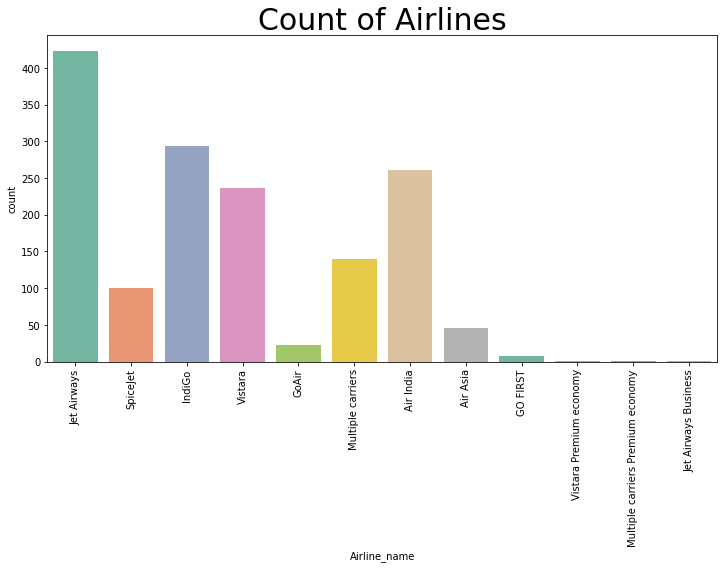

In [17]:
# Here ploting Count of Airlines :
plt.figure(figsize=(12,6))
sns.countplot(df['Airline_name'], palette='Set2')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

observation :- count of jet airways, indigo and air india airline is higher then others. Travellars are likes this airlines for travelling.

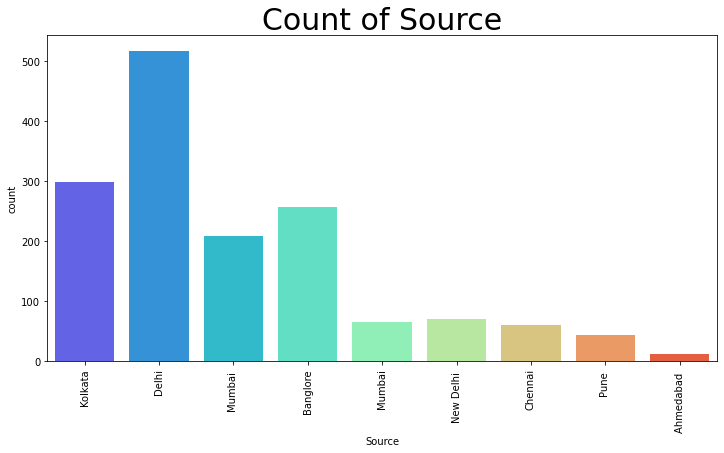

In [19]:
# Here ploting Count of Source :
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='rainbow')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

observation :- count of Delhi source is high then other city. Kolkata and Banglore has average count. Delhi is capital of india and it's center city of india so obvious source of this city is high.

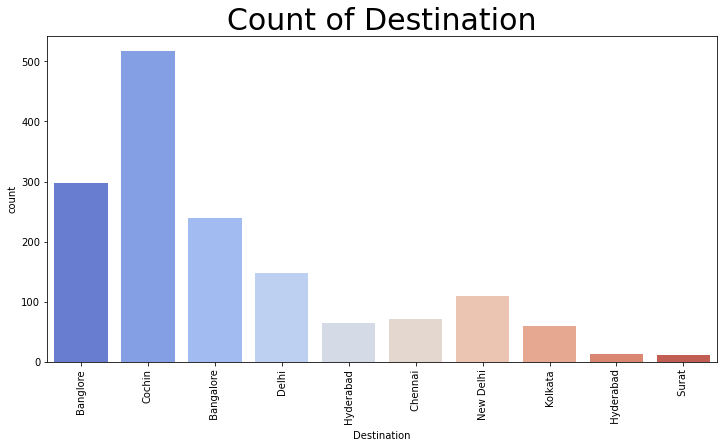

In [20]:
# Here ploting Count of Source :
plt.figure(figsize=(12,6))
sns.countplot(df['Destination'], palette='coolwarm')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90)
plt.show()

observation :- count of Cochin and Banglore city destination is high then other city. All It sector releted and digital things releted banglore is first choice.

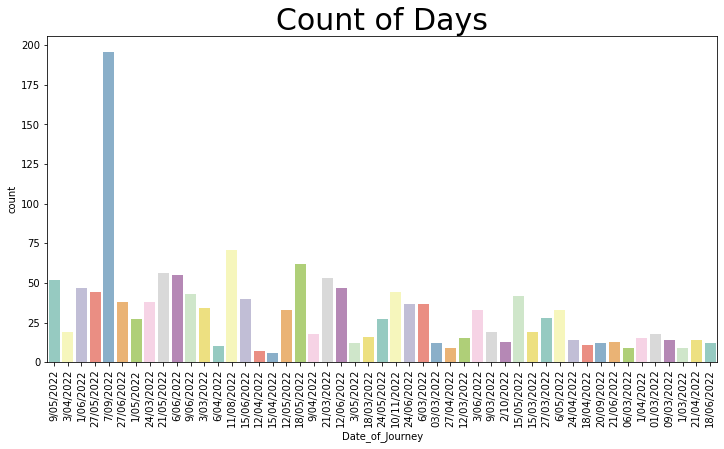

In [21]:
# Here ploting Count of Days :
plt.figure(figsize=(12,6))
sns.countplot(df['Date_of_Journey'], palette='Set3')
plt.title('Count of Days', size=30)
plt.xticks(rotation=90)
plt.show()

Observation :-In this may and june month days are very much because of vacation time.

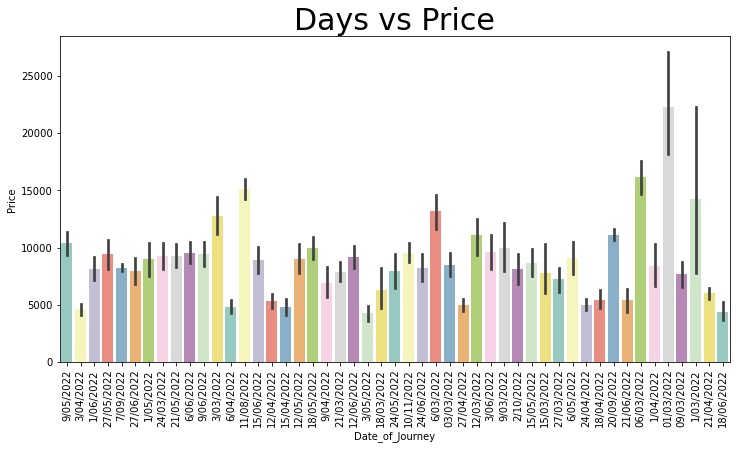

In [22]:
# Here Plotting days vs price plot:
plt.figure(figsize=(12,6))
sns.barplot(df['Date_of_Journey'], df['Price'], palette='Set3')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Observation :-In this april month ticket price is lower then other months. It's best time to buy tickets.

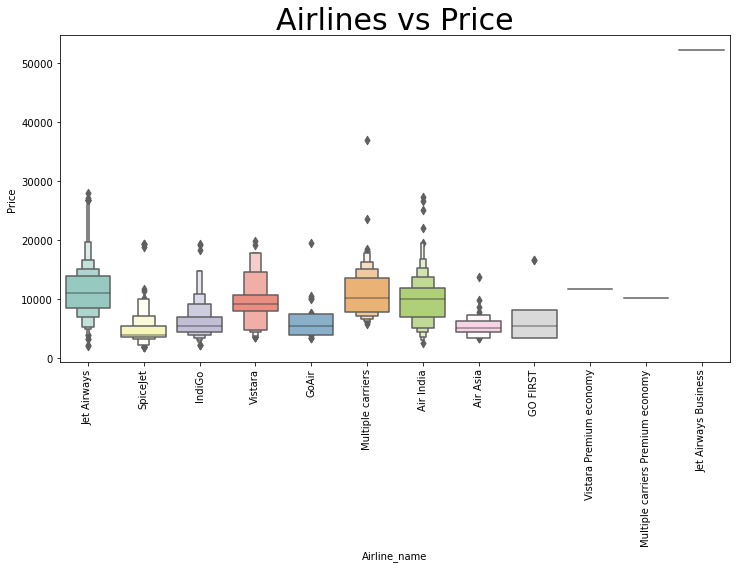

In [23]:
# Here Plotting Price vs Airline plot:
plt.figure(figsize=(12,6))
sns.boxenplot(df['Airline_name'], df['Price'],palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

Observation :-jet airways and multiple carriers airline has higher price than others.

array([[<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

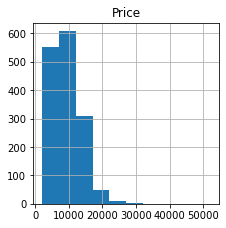

In [24]:
# display histogram:
df.hist(figsize=(12,12), layout=(3,3), sharex=False)

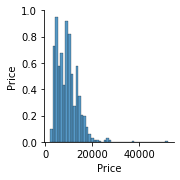

In [25]:
# display pairplot:
sns.pairplot(df)

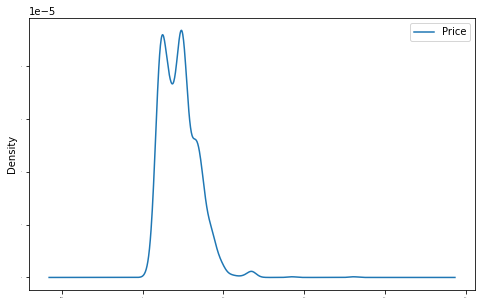

In [27]:
# Let's check desity plot:
df.plot(kind='density', subplots=True, layout=(1,1), sharex=False, legend=True, fontsize=1, figsize=(8,5))
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

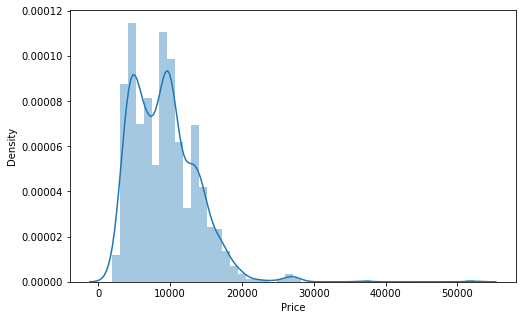

In [28]:
#display distplot of Price column:
plt.figure(figsize=(8,5))
sns.distplot(df['Price'])

In [29]:
# Here Airline  Nominal Categorical data:
Airline = df[["Airline_name"]]
Airline = pd.get_dummies(Airline, drop_first =True)
Airline.head()

,Airline_name_Air India,Airline_name_GO FIRST,Airline_name_GoAir,Airline_name_IndiGo,Airline_name_Jet Airways,Airline_name_Jet Airways Business,Airline_name_Multiple carriers,Airline_name_Multiple carriers Premium economy,Airline_name_SpiceJet,Airline_name_Vistara,Airline_name_Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


### Feature Engineering

In [30]:
# Here converting the hours in minutes:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [32]:
# Here we are organizing the format of the date of journey in our dataset for better:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [34]:
# Converting departure time into hours and minutes:
df["Dep_hour"] = pd.to_datetime(df["Departure_time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Departure_time"]).dt.minute
df.drop(["Departure_time"], axis = 1, inplace = True)

In [35]:
# Here converting the arrival time into hours and minutes:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_time).dt.minute
df.drop(["Arrival_time"], axis = 1, inplace = True)

In [36]:
# Showing dataframe after performing feature engineering.
df.head()

,Airline_name,Source,Destination,Duration,Total_stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Kolkata,Banglore,1520,1 stop,10953,9,5,9,35,10,55
1,SpiceJet,Kolkata,Banglore,150,non-stop,3841,3,4,17,10,19,40
2,IndiGo,Delhi,Cochin,295,1 stop,6842,1,6,5,10,10,5
3,Jet Airways,Delhi,Cochin,1655,1 stop,12898,27,5,9,0,12,35
4,Vistara,Mumbai,Bangalore,925,1 stop,9280,7,9,17,35,9,0


### Correlation of dataset:

In [37]:
# Check correlation of columns.
df.corr()

,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Duration,1.000000,0.499500,-0.037480,0.019645,0.068475,-0.002053,0.057886,-0.032554
Price,0.499500,1.000000,-0.152111,-0.004084,0.017663,0.043833,0.020253,-0.080204
Journey_day,-0.037480,-0.152111,1.000000,-0.237447,0.036540,-0.054174,-0.003746,-0.026165
Journey_month,0.019645,-0.004084,-0.237447,1.000000,0.024752,0.008991,0.061388,0.043930
Dep_hour,0.068475,0.017663,0.036540,0.024752,1.000000,-0.018710,0.007812,0.043703
Dep_min,-0.002053,0.043833,-0.054174,0.008991,-0.018710,1.000000,0.038423,0.019927
Arrival_hour,0.057886,0.020253,-0.003746,0.061388,0.007812,0.038423,1.000000,-0.124905
Arrival_min,-0.032554,-0.080204,-0.026165,0.043930,0.043703,0.019927,-0.124905,1.000000


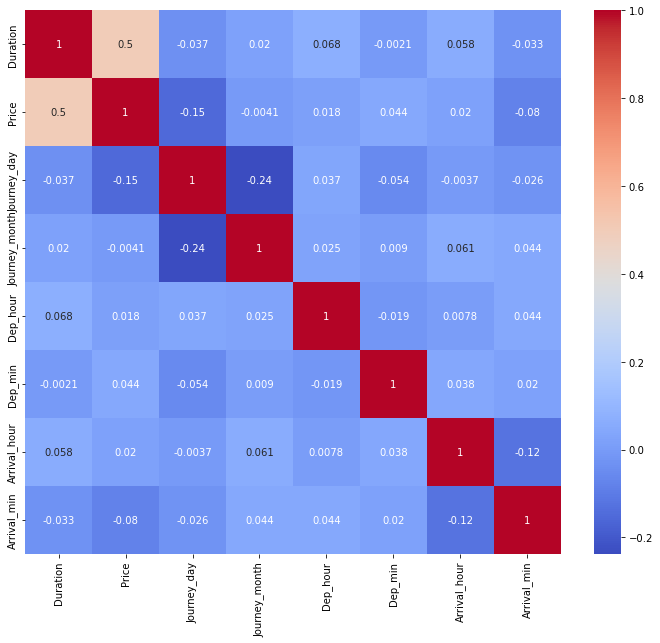

In [38]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

##### Observation :- In this correlation matrix price and duration is highly correlate with each other.

In [39]:
# Dropping the Price column:
data = df.drop(["Price"], axis=1)

# Here convert into Categorical Data and Numerical Data:
categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

In [40]:
# Display categorical_data before labelEncoder.
categorical_data.head()

,Airline_name,Source,Destination,Total_stops
0,Jet Airways,Kolkata,Banglore,1 stop
1,SpiceJet,Kolkata,Banglore,non-stop
2,IndiGo,Delhi,Cochin,1 stop
3,Jet Airways,Delhi,Cochin,1 stop
4,Vistara,Mumbai,Bangalore,1 stop


In [41]:
# Apply Label Encoder to all datatset:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [42]:
# Display categorical_data after labelEncoder.
categorical_data.head()

,Airline_name,Source,Destination,Total_stops
0,5,4,4,0
1,9,4,4,3
2,4,3,5,0
3,5,3,5,0
4,10,6,0,0


In [43]:
# Display numerical_data.
numerical_data.head()

,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,1520,9,5,9,35,10,55
1,150,3,4,17,10,19,40
2,295,1,6,5,10,10,5
3,1655,27,5,9,0,12,35
4,925,7,9,17,35,9,0


### Remove skewness and outliers.

In [44]:
# Check skewness:
numerical_data.skew().sort_values(ascending=False)

Duration         0.845360
Journey_month    0.681041
Journey_day      0.417715
Dep_min          0.128924
Arrival_min      0.091013
Dep_hour         0.040286
Arrival_hour    -0.354108
dtype: float64

In [45]:
# Remove skewness using log transform and sqrt method:
import numpy as np
numerical_data['Duration']=np.sqrt(numerical_data['Duration'])

In [46]:
# Check skewness after removing skewness:
numerical_data.skew().sort_values(ascending=False)

Journey_month    0.681041
Journey_day      0.417715
Duration         0.304736
Dep_min          0.128924
Arrival_min      0.091013
Dep_hour         0.040286
Arrival_hour    -0.354108
dtype: float64

array([[<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Journey_month'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>],
       [<AxesSubplot:title={'center':'Arrival_min'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

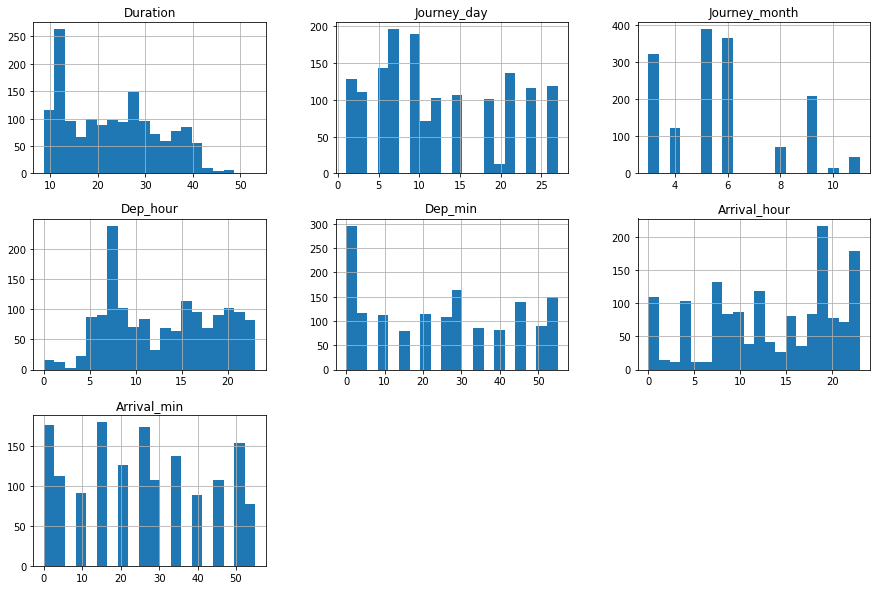

In [47]:
# Display histogram of all columns after remove skewness:
numerical_data.hist(figsize=(15,10), layout=(3,3), sharex=False, bins=20)

Duration            AxesSubplot(0.125,0.657941;0.227941x0.222059)
Journey_day      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Journey_month    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Dep_hour            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Dep_min          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Arrival_hour     AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Arrival_min            AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

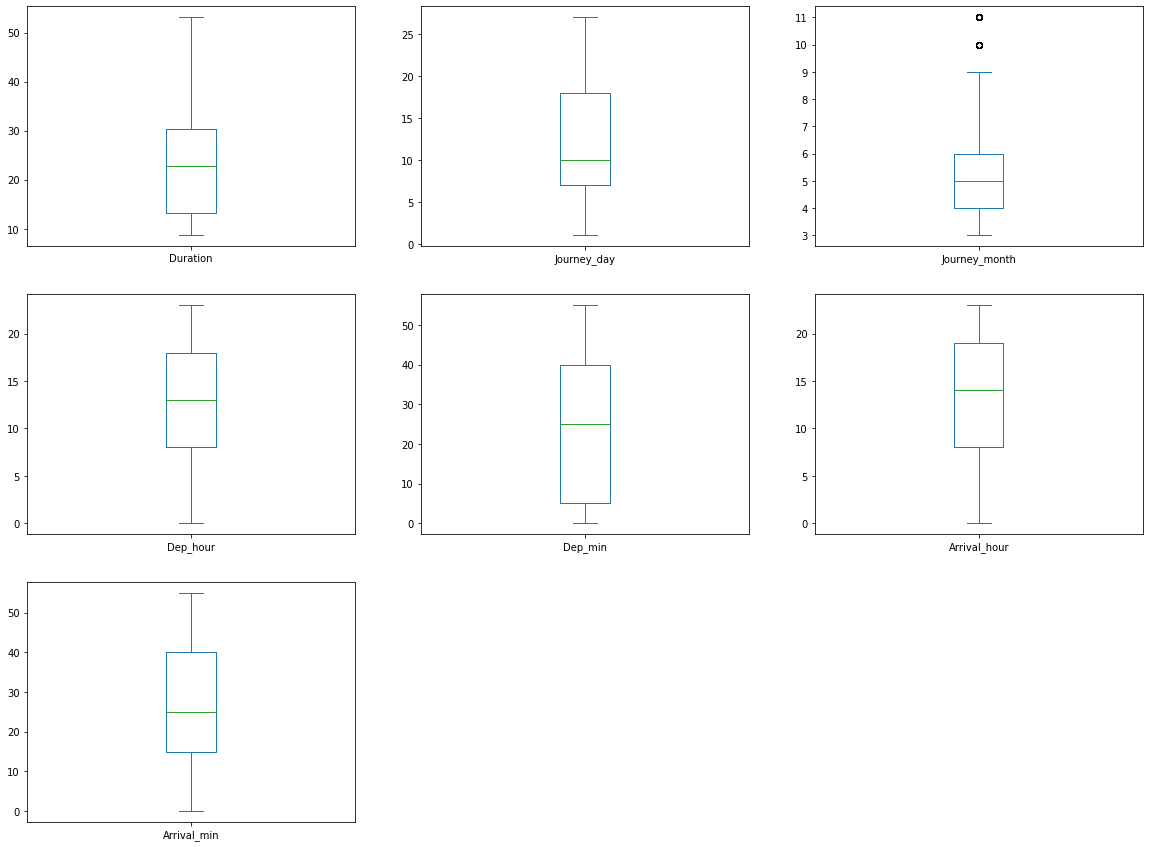

In [48]:
# Checking outliers with boxplot:
numerical_data.plot(kind='box', subplots=True, layout=(3,3), figsize=(20,15))

In [50]:
# Lets quantify:
from scipy.stats import zscore
(np.abs(zscore(numerical_data))<3).all()

Duration         False
Journey_day       True
Journey_month     True
Dep_hour          True
Dep_min           True
Arrival_hour      True
Arrival_min       True
dtype: bool

In [51]:
# Detecting outliers:
from scipy.stats import zscore
z = np.abs(zscore(numerical_data))
print(np.where(z>3))

(array([1046], dtype=int64), array([0], dtype=int64))


### Data Preprocessing (split the data into independent 'x' and dependent 'y' datasets)

In [52]:
# Here Concatenating both Categorical Data and Numerical Data:
x = pd.concat([categorical_data, numerical_data], axis=1)
y = df['Price']

In [54]:
x.head()

,Airline_name,Source,Destination,Total_stops,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,5,4,4,0,38.987177,9,5,9,35,10,55
1,9,4,4,3,12.247449,3,4,17,10,19,40
2,4,3,5,0,17.175564,1,6,5,10,10,5
3,5,3,5,0,40.681691,27,5,9,0,12,35
4,10,6,0,0,30.413813,7,9,17,35,9,0


In [55]:
y.head()

0    10953
1     3841
2     6842
3    12898
4     9280
Name: Price, dtype: int64

In [56]:
print(x.shape, y.shape)

(1533, 11) (1533,)


# Scaling the data.

In [57]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()
x = st.fit_transform(x)
x

array([[-0.05204319,  0.20716433, -0.15155037, ...,  0.54456632,
        -0.50335041,  1.72537747],
       [ 1.27766042,  0.20716433, -0.15155037, ..., -0.78265175,
         0.81543531,  0.84125368],
       [-0.3844691 , -0.3311118 ,  0.24558931, ..., -0.78265175,
        -0.50335041, -1.22170182],
       ...,
       [-0.3844691 ,  2.36026881, -1.74010908, ..., -0.25176452,
         1.4015623 ,  1.72537747],
       [-0.3844691 , -0.3311118 ,  0.24558931, ...,  0.54456632,
         0.37584007, -0.92699389],
       [-1.38174681, -0.3311118 ,  0.24558931, ...,  1.34089716,
         0.81543531, -0.63228596]])

# Training process begins.

#### Finding best random_state

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [59]:
model = [lr,rf,abr,gbr,dtr]
max_r2_score = 0
for r_state in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = r_state)
    for i in model:
        i.fit(x_train,y_train)
        pred_test = i.predict(x_test)
        r2_sc = r2_score(y_test,pred_test)
        print("R2 score correspond to random state ",r_state,"is",r2_sc)
        if r2_sc > max_r2_score:
            max_r2_score = r2_sc
            final_state = r_state
            final_model = i

R2 score correspond to random state  0 is 0.3469653795551043
R2 score correspond to random state  0 is 0.6035143049090321
R2 score correspond to random state  0 is 0.4115476488733987
R2 score correspond to random state  0 is 0.6392718713979728
R2 score correspond to random state  0 is 0.2739793673204928
R2 score correspond to random state  1 is 0.4065734561538936
R2 score correspond to random state  1 is 0.7836734236308948
R2 score correspond to random state  1 is 0.3939328711928456
R2 score correspond to random state  1 is 0.7333091669325535
R2 score correspond to random state  1 is 0.6124121816384613
R2 score correspond to random state  2 is 0.3715915995241039
R2 score correspond to random state  2 is 0.68509848290005
R2 score correspond to random state  2 is 0.37928566324965873
R2 score correspond to random state  2 is 0.6581272870528576
R2 score correspond to random state  2 is 0.48967248139964303
R2 score correspond to random state  3 is 0.3717148499326087
R2 score correspond to r

R2 score correspond to random state  26 is 0.6822964839753428
R2 score correspond to random state  26 is 0.3012458849873467
R2 score correspond to random state  27 is 0.41833386389159644
R2 score correspond to random state  27 is 0.7959828803188591
R2 score correspond to random state  27 is 0.5356686889738205
R2 score correspond to random state  27 is 0.7510580816132341
R2 score correspond to random state  27 is 0.6989376199827249
R2 score correspond to random state  28 is 0.41199201903391025
R2 score correspond to random state  28 is 0.7796209401623959
R2 score correspond to random state  28 is 0.44191417002369715
R2 score correspond to random state  28 is 0.7288830311753978
R2 score correspond to random state  28 is 0.6767943672048236
R2 score correspond to random state  29 is 0.42147594208841976
R2 score correspond to random state  29 is 0.804924825079143
R2 score correspond to random state  29 is 0.5776211794431463
R2 score correspond to random state  29 is 0.7347226539749387
R2 sc

R2 score correspond to random state  53 is 0.6824648774586559
R2 score correspond to random state  53 is 0.49069069365916373
R2 score correspond to random state  53 is 0.6513096819955344
R2 score correspond to random state  53 is 0.5566418043003274
R2 score correspond to random state  54 is 0.440175070195406
R2 score correspond to random state  54 is 0.7953139954432775
R2 score correspond to random state  54 is 0.47164071174983724
R2 score correspond to random state  54 is 0.7616901304757551
R2 score correspond to random state  54 is 0.6470261972887568
R2 score correspond to random state  55 is 0.38571633042051734
R2 score correspond to random state  55 is 0.7737652000232691
R2 score correspond to random state  55 is 0.5274868303018604
R2 score correspond to random state  55 is 0.7317790394020147
R2 score correspond to random state  55 is 0.6019897634079772
R2 score correspond to random state  56 is 0.3876620114540612
R2 score correspond to random state  56 is 0.8026959788289126
R2 sco

R2 score correspond to random state  80 is 0.6839425602604934
R2 score correspond to random state  80 is 0.49034153251249757
R2 score correspond to random state  80 is 0.6348358438981956
R2 score correspond to random state  80 is 0.6709612525964457
R2 score correspond to random state  81 is 0.4494365444089631
R2 score correspond to random state  81 is 0.7079602924510282
R2 score correspond to random state  81 is 0.5348526042999479
R2 score correspond to random state  81 is 0.7408268127233937
R2 score correspond to random state  81 is 0.48207143836882627
R2 score correspond to random state  82 is 0.40873851819872353
R2 score correspond to random state  82 is 0.7507901025829602
R2 score correspond to random state  82 is 0.4413514032041923
R2 score correspond to random state  82 is 0.7281312343461082
R2 score correspond to random state  82 is 0.49972729284679807
R2 score correspond to random state  83 is 0.353468800306066
R2 score correspond to random state  83 is 0.6324441429968739
R2 sc

In [60]:
print("max R2 score correspond to random state ",final_state,"is",max_r2_score,"and model is",final_model)

max R2 score correspond to random state  79 is 0.8307051042076956 and model is RandomForestRegressor()


# Creating train-test split:

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.20,random_state = 79)

### Apply best model:

In [62]:
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("r2 score :- ",r2_score(y_test,pred))

r2 score :-  0.8297931346192062


In [63]:
# Predict the value:
print("predicted ticket price:",pred)
print("actual ticket price",y_test)

predicted ticket price: [ 3180.86       11339.54       13469.22        5187.15
 12701.6         7005.8         8448.695      14926.715
  2646.035      10070.         10492.43       14472.525
  4537.64       13219.72        6786.39        8555.87
  4462.9825      6542.58       16606.37        7713.72866667
  5887.95       11988.77       11428.82        9268.68
  3846.22       11391.27       10078.43        4627.54666667
  9282.75        3821.58       11603.04714286 11066.12833333
  8357.63        6246.35       12048.24        3866.035
 13268.71        4445.75        9446.03        9280.
  8074.42        7543.49       10697.11       12118.7
 16700.04        7618.94       11386.1        12011.775
 13075.5275     11767.53        4083.69        6830.98
  4426.09666667  4721.95        6553.71       12033.425
 10242.44166667  4703.68       10128.16       12111.16166667
 12271.13       13064.66       12244.82        9083.58166667
 16895.73        6238.31        9596.8025      7911.72
  4789.22

### Check MAE, MSE and RMSE:

In [64]:
# Display MAE, MSE and RMSE:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('error:')

print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squared error',mean_squared_error(y_test,pred))

print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 1240.9198928959206
mean squared error 3241536.9721175395
Root mean squared error 1800.426886079393


# Cross Validation of the model:

In [65]:
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred)
for i in range(2,10):
    lsscore = cross_val_score(rf,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("cross validation score is :-",lsc*100)
    print("r2 score is :-",lss*100)
    print("\n")

At cv:- 2
cross validation score is :- 68.43457915641702
r2 score is :- 82.97931346192063


At cv:- 3
cross validation score is :- 70.66706361060356
r2 score is :- 82.97931346192063


At cv:- 4
cross validation score is :- 74.69809460352386
r2 score is :- 82.97931346192063


At cv:- 5
cross validation score is :- 73.20057144736649
r2 score is :- 82.97931346192063


At cv:- 6
cross validation score is :- 73.94119697734138
r2 score is :- 82.97931346192063


At cv:- 7
cross validation score is :- 73.66519322484486
r2 score is :- 82.97931346192063


At cv:- 8
cross validation score is :- 74.26493196589652
r2 score is :- 82.97931346192063


At cv:- 9
cross validation score is :- 74.38974237499241
r2 score is :- 82.97931346192063




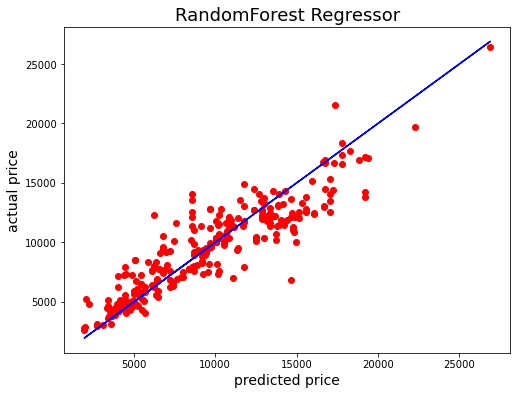

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred, color = 'r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("predicted price",fontsize=14)
plt.ylabel("actual price",fontsize=14)
plt.title("RandomForest Regressor",fontsize=18)
plt.show()

# Hypertuning of the model:

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [69]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [70]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, scoring='neg_mean_squared_error', n_iter = 10, cv = 4, verbose=2, random_state=79, n_jobs = 1)

In [71]:
rf_random.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_es

RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=79, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [73]:
rf = RandomForestRegressor(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print("R2 score:",rfs*100)

rfscore = cross_val_score(rf,x,y,cv=4)
rfc = rfscore.mean()
print("Cross Val Score is",rfc*100)

R2 score: 81.46995701280109
Cross Val Score is 71.72954936874227


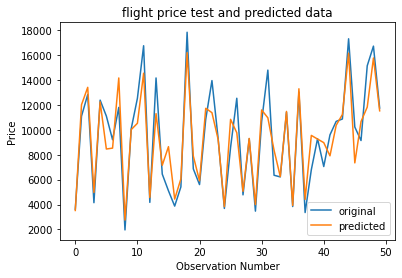

In [74]:
number_of_observations=50

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, pred_decision[:number_of_observations], label="predicted")

plt.title("flight price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

# Model Saving:

In [75]:
import pickle
filename = 'flight_fare.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [76]:
import numpy as np
a = np.array(y_test)
#predicted = np.array(ls.predict(x_test))
df_comp = pd.DataFrame({'original':a,'predicted':pred_decision},index=range(len(a)))
df_comp

,original,predicted
0,3625,3524.496667
1,11087,12003.376667
2,12819,13399.625000
3,4148,4968.530000
4,12373,12231.036667
...,...,...
302,4050,6096.193333
303,10156,7901.367222
304,4030,6743.411667
305,3873,4408.320000
